## Problem Walkthrough

### Hotel Booking Cancelation Prediction

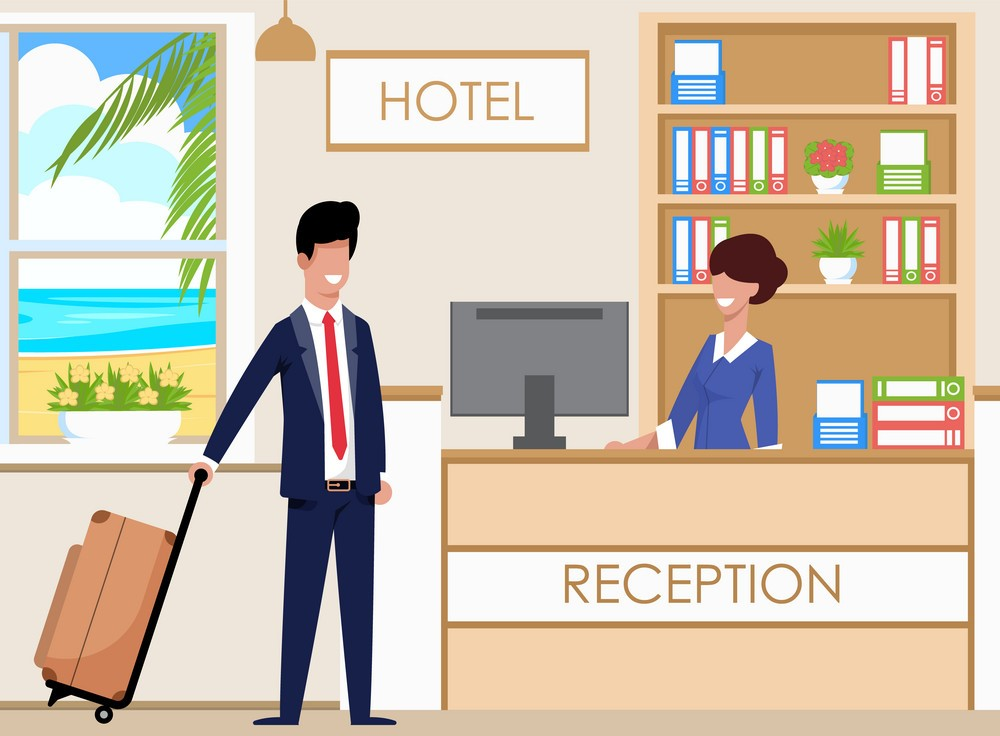

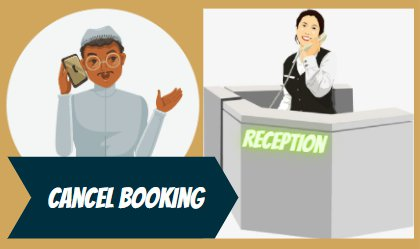

In pursuit of profitability, Every business nowadays is eye balling towards predictions.. If they could predict their key metrics..They can implement certain changes to improve those..<br>
Same here.. Hotel business are capable of generating higher margins.. But only if correct business strategies are executed.. Hotel's have a dedicated staff which is ready to serve their guests.. But if cancelations happen recurringly..Then the hotel business starts incurring losses as they have their fixed costs such as staff which has to be taken care off...<br>
So what if, we could predict how likely are chances of a guest to cancel his/her upcoming hotel booking??? This analysis done below deep dives into a hotel booking dataset to understand and learn certain characterstics which are highly predictive of booking cancelations... and lastly those characterstics are fitted into the best of models to improve our accuracy of predicting the cancelations.....

### Project Dependencies

First things first, let's import the libraries which will be used in our machine learning model.
>**Pandas:**<br> 
Pandas has been one of the most commonly used tools for Machine learning, which is used for data cleaning and analysis.Based on the features available in pandas we can say pandas is best for handling data. It can handle missing data, cleaning up the data and it supports multiple file formats. This means it can read or load data in many formats like CSV, Excel, SQL, etc.
In this project, we will load CSV file using Pandas. 

>**Numpy:**<br> 
NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

>**SKLearn:**<br>
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.
>>**Logistic Regression:** It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.<br><br>
>>**KNN:** It is a Machine Learning Classification which works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).<br><br>
>>**Decision Tree:** A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.<br><br>
>>**Random Forest:** A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.<br><br>
>>**Multi-Layer Perceptron** (MLP) is the simplest type of artificial neural network. It is a combination of multiple perceptron models. Perceptrons are inspired by the human brain and try to simulate its functionality to solve problems. In MLP, these perceptrons are highly interconnected and parallel in nature. This parallelization helpful in faster computation.<br><br>

>**Seaborn:** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br>
>**Matplotlib:** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.<br><br>
>**Plotly:** The plotly library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases..<br><br>

In [1]:
# These libraries will be used to perform data analysis, data visualizations and perform machine learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

### Defining the dataframe and reading it

In [2]:
# Defining the dataframe
df = pd.read_csv("hotel_bookings.csv")

119390 rows and 30 columns

In [3]:
# Reading 10 random values in the dataset
filename = "hotel_bookings.csv"
n = sum(1 for line in open(filename)) - 1
s = 10
skip = sorted(random.sample(range(1,n+1),n-s)) 
df_random = pd.read_csv(filename, skiprows=skip)
df_random

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,1,144,2017,March,11,14,4,14,2,0,0,HB,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,440.0,NaN,0,Transient-Party,62.00,0,0
1,Resort Hotel,1,2,2015,October,42,14,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,1,0,A,A,0,No Deposit,NaN,NaN,0,Transient,47.00,0,0
2,Resort Hotel,1,259,2015,September,38,17,0,3,2,0,0,BB,GBR,Groups,Corporate,0,1,0,A,A,0,Non Refund,NaN,223.0,0,Transient,40.05,0,0
3,Resort Hotel,0,1,2016,November,47,18,0,2,2,0,0,BB,MWI,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,NaN,0,Transient,86.00,1,1
4,Resort Hotel,0,21,2017,June,22,1,2,5,2,0,0,HB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,479.0,NaN,0,Transient,93.00,0,0
5,City Hotel,0,7,2015,August,33,15,2,3,2,1,0,BB,LUX,Direct,Direct,0,0,0,A,D,0,No Deposit,14.0,NaN,0,Transient,90.00,0,1
6,City Hotel,0,2,2015,September,37,10,2,4,1,0,0,BB,ITA,Direct,Direct,0,0,0,A,A,4,No Deposit,NaN,NaN,0,Transient,115.00,0,1
7,City Hotel,1,188,2016,June,25,15,0,2,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,119.0,NaN,39,Transient,130.00,0,0
8,City Hotel,0,93,2016,August,33,13,0,1,2,0,0,BB,FRA,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,NaN,0,Transient,109.83,0,1
9,City Hotel,0,306,2016,August,34,14,2,1,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,95.40,0,3


### Investigating The Dataset <br>

Lets note down individual features, what are they about and thoughts on what relation to expect with the target variable..

| **Feature**       | **About**                     | **Thoughts on Expected Relation with the Target Variable** | 
|------------------	|-------------------------------------------	| -------------------------------------------	|
| **hotel**      	| The Type of hotel booked by customer  | (+ve) Correlation, because of facilities available |
| **lead_time**    	| The delta between the time the booking enters Hotel's ERP system and arrival date of customer | (+ve) correlation as the chances of cancellations become high, because of plans change, more new attractive deals.
| **arrival_date_year**      	| The arrival year of the customer  | Neutral Correlation |
|**arrival_date_month**	    | The arrival month of the customer  | Some months can have higher cancellations and some can have lower cancellations, needs investigation |
|**arrival_date_week_number**  | The arrival week number of the customer| Doesn't matter, Neutral Correlation |
|**arrival_date_day_of_month** 	|The arrival day of that month of the customer  | Doesn't matter, Neutral Correlation |
|**stays_in_weekend_nights** | The number of nights customer has booked in the weekend (Saturday-Sunday)| (-ve) correlation because mostly hotels are fully occupied in weekends, so less changes that customer can cancel in weekends |
| **stays_in_week_nights** |  The number of nights customer has booked in the week (Monday-Friday)| (+ve) correlation because of more available choices, and something urgents pops up in the work |
| **adults** |  Number of adults in a booking | Neutral Correlation |
| **children**| Number of children in a booking | Higher the number of children, more chances of cancellation, (+ve) correlation |
| **babies** | Number of babies in a booking  | Higher the number of babies, more chances of cancellation, (+ve) correlation.
| **meal** | the type of meal plan included in the booking | Doesn't matter, Neutral Correlation |
| **country** |country of origin of the customer | Doesn't matter, Neutral correlation |
| **market_segment**   |The source of market where booking has come |  Doesn't matter, Neutral correlation |
| **distribution_channel**     |The channel from which customer has booked the stay	| Doesn't matter, Neutral correlation |
| **is_repeated_guest**    | Is the booking done from repeated guest?| (-ve) correlation, repeated guests are less like to cancel the hotel booking |
| **previous_cancellations** |Has the customer canceled any booking prior to this current booking | (+ve) correlation |
| **previous_bookings_not_canceled**   | Number of previous booking that were cancelled prior to current booking   | (-ve_ correlation
| **reserved_room_type**     | Room type booked by the customer      	| Doesn't matter. Neutral correlation
| **assigned_room_type**     | Room type alloted to customer | (+ve) correlation, if alloted room is not as same as reserved, then booking cancellation chances are higher |
| **booking_changes** | Number of changes made to booking by the customer| (-ve) correlation, as if customer is spending time in customizing the booking, then customer is less likely to cancel the booking |
|**deposit_type**    | Indicates if customer has made some security deposit for the booking| (-ve) correlation, if customer pays a deposit, then less likely to cancel the booking
| **agent** |ID of travel agency which made the booking | Doesn't matter, Neutral correlation |
| **company**   | ID of company which made the booking and responsibile for payment to the hotel    | Doesn't matter, Neutral correlation |
| **days_in_waiting_list**  |Number of days customer has to be in waiting list before booking got confirmed| (+ve) correlation, higher the days in waiting list, more chances of cancellation |
| **customer_type** | The type of customer who has booked the stay | (+ve) correlation, certain types of customer are more likely to cancel the booking |
|**adr**  | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights | Doesn't matter, Neutral Correlation |
| **required_car_parking_spaces** 	| Does customer need a parking space?  | (+ve) correlation, if customer has car and hotel doesn't have parking space, then chances of cancellation are much higher |
| **total_of_special_requests** | the summ total of requests made by customer | Doesn't matter, Neutral Correlation |

In [70]:
#Getting the info about dataset...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84460 entries, 0 to 119389
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     84460 non-null  int64  
 1   lead_time                       84460 non-null  int64  
 2   arrival_date_year               84460 non-null  int64  
 3   arrival_date_week_number        84460 non-null  int64  
 4   stays_in_weekend_nights         84460 non-null  int64  
 5   stays_in_week_nights            84460 non-null  int64  
 6   adults                          84460 non-null  int64  
 7   children                        84460 non-null  float64
 8   babies                          84460 non-null  int64  
 9   is_repeated_guest               84460 non-null  int64  
 10  previous_cancellations          84460 non-null  int64  
 11  previous_bookings_not_canceled  84460 non-null  int64  
 12  agent                          

Total 119390 records

Missing Data:

1. Company
2. Agent
3. Country

**let's find the above features which have missing values**

In [5]:
# Finding Missing Values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Let's first investigate **country**. Lets have a look at the unique countries with their count

In [6]:
country = df.groupby('country')['country'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(country.to_string())

    country  count
135     PRT  48590
59      GBR  12129
56      FRA  10415
51      ESP   8568
43      DEU   7287
81      ITA   3766
76      IRL   3375
15      BEL   2342
25      BRA   2224
123     NLD   2104
169     USA   2097
29      CHE   1730
34       CN   1279
12      AUT   1263
154     SWE   1024
31      CHN    999
133     POL    919
80      ISR    669
140     RUS    632
124     NOR    607
139     ROU    500
54      FIN    447
46      DNK    435
11      AUS    426
1       AGO    362
100     LUX    287
103     MAR    259
162     TUR    248
72      HUN    230
6       ARG    214
85      JPN    197
42      CZE    171
75      IND    152
91      KOR    133
66      GRC    128
48      DZA    103
149     SRB    101
71      HRV    100
107     MEX     85
52      EST     83
77      IRN     83
99      LTU     81
174     ZAF     80
19      BGR     75
126     NZL     74
35      COL     71
166     UKR     68
113     MOZ     67
152     SVK     65
30      CHL     65
158     THA     59
79      ISL 

To from the table above, we see the top 5 countries in our dataset are 'PRT','GBR','FRA','ESP','DEU' .. So we can group the remaining countries as 'Others', This will also take care of null values in country column...

In [7]:
for i in range(len(df)):
    if df.loc[i, 'country'] == 'PRT':
        df.at[i, 'country'] = 'PRT'
    elif df.loc[i, 'country'] == 'GBR':
        df.at[i, 'country'] = 'GBR'
    elif df.loc[i, 'country'] == 'FRA':
        df.at[i, 'country'] = 'FRA'    
    elif df.loc[i, 'country'] == 'ESP':
        df.at[i, 'country'] = 'ESP'
    elif df.loc[i, 'country'] == 'DEU':
        df.at[i, 'country'] = 'DEU'
    else:
        df.at[i, 'country'] = 'Others' 

In [8]:
#checking unique value of country....
df['country'].unique()

array(['PRT', 'GBR', 'Others', 'ESP', 'FRA', 'DEU'], dtype=object)

#### Now let's investigate **agent**. Lets have a look at the unique agents with their count

In [9]:
agent = df.groupby('agent')['agent'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(agent.to_string())

     agent  count
8      9.0  31961
173  240.0  13922
0      1.0   7191
13    14.0   3640
6      7.0   3539
5      6.0   3290
182  250.0   2870
174  241.0   1721
26    28.0   1666
7      8.0   1514
2      3.0   1336
35    37.0   1230
17    19.0   1061
38    40.0   1039
227  314.0    927
19    21.0    875
168  229.0    786
175  242.0    780
72    83.0    696
27    29.0    683
136  171.0    607
11    12.0    578
73    85.0    554
18    20.0    540
84    96.0    537
176  243.0    514
28    30.0    484
108  134.0    482
214  298.0    472
25    27.0    450
14    15.0    402
24    26.0    401
10    11.0    395
20    22.0    382
49    56.0    375
196  273.0    349
140  177.0    347
74    86.0    338
51    58.0    335
4      5.0    330
99   119.0    304
153  196.0    301
32    34.0    294
41    44.0    292
110  138.0    287
228  315.0    284
36    38.0    274
9     10.0    260
172  236.0    247
15    16.0    246
16    17.0    241
96   115.0    225
183  251.0    220
40    42.0    211
59    68.0

In [10]:
for i in range(len(df)):
    if df.loc[i, 'agent'] == 9:
        df.at[i, 'agent'] = 9
    elif df.loc[i, 'agent'] == 240:
        df.at[i,'agent'] = 240
    elif df.loc[i, 'agent'] == 1:
        df.at[i, 'agent'] = 1    
    elif df.loc[i, 'agent'] == 14:
        df.at[i, 'agent'] = 14
    elif df.loc[i, 'agent'] == 7:
        df.at[i, 'agent'] = 7
    elif df.loc[i, 'agent'] == 6:
        df.at[i,'agent'] = 6
    elif df.loc[i, 'agent'] == 250:
        df.at[i,'agent'] = 250
    else:
        df.at[i, 'agent'] = 0

In [11]:
#checking unique value of agent....
df['agent'].unique()

array([  0., 240., 250.,   9.,   6.,   1.,   7.,  14.])

#### Now let's investigate **company**. Lets have a look at the unique company with their count

In [12]:
company = df.groupby('company')['company'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(company.to_string())

     company  count
20      40.0    927
131    223.0    784
37      67.0    267
23      45.0    250
92     153.0    215
102    174.0    149
127    219.0    141
170    281.0    138
93     154.0    133
263    405.0    119
138    233.0    114
28      51.0     99
56      94.0     87
25      47.0     72
81     135.0     66
101    169.0     65
143    242.0     62
204    331.0     61
215    348.0     59
328    498.0     58
69     110.0     52
18      38.0     51
9       20.0     50
169    280.0     48
53      91.0     48
211    342.0     48
34      62.0     47
113    197.0     47
38      68.0     46
126    218.0     43
160    270.0     43
112    195.0     38
115    202.0     38
2        9.0     37
89     148.0     37
186    307.0     36
71     113.0     36
117    204.0     34
141    238.0     33
159    269.0     33
187    308.0     33
51      86.0     32
40      72.0     30
246    385.0     30
212    343.0     29
229    365.0     29
22      43.0     29
103    178.0     27
129    221.0     27


Company column has loads of missing data, and from the table above we could see that all the companies have booking
counts less than 1000, so there seems no relation between company and hotel booking cancelations.. so let's remove this feature..

In [13]:
df.drop(['company'],axis=1,inplace=True)

#### So, After fixing the missing values.. Lets now check the relation between all features and our target variable... So that we can keep the features which are highly predictive of 'is_canceled' and drop all others..

### Feature Selection

**Hotel Type vs Cancellation**

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


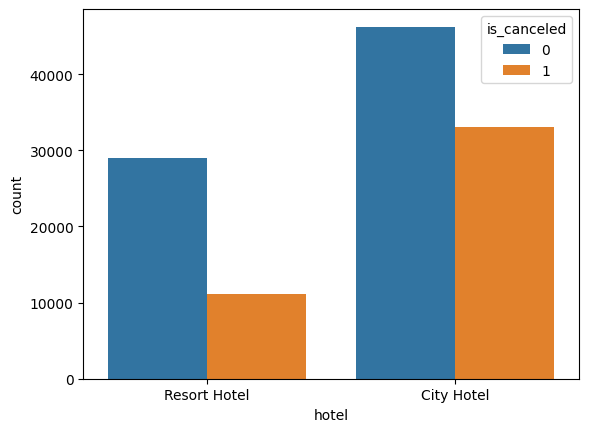

In [14]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(df[df['hotel']=='City Hotel'])))

It is evident from the graph that cancelations in city hotel are 14 % higher than resort hotels..May be because customers would really want to spend some quality vacation and have spent time in searching and booking the resort, whereas city hotels are mainly used for urgent work purposes, for which the plan can change and thus higher rates of cancelation

**Lead Time vs Cancellation**

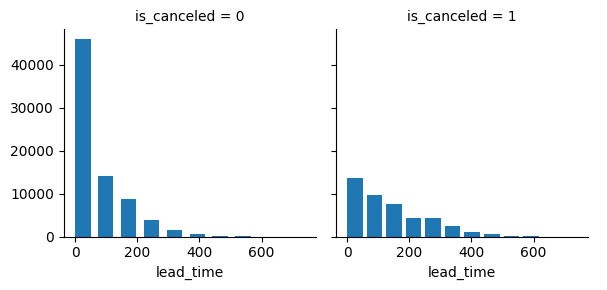

In [15]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

As lead time increases, the cancellation rate decreases... Hence let's keep this feature

**Arrival Year vs Cancellation**

<AxesSubplot: xlabel='arrival_date_year', ylabel='count'>

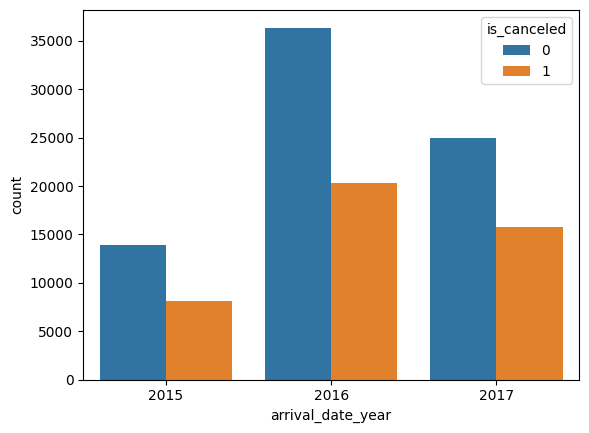

In [16]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

From the graph, we can infer that as cancellations increased from 2015 to 2016, but again cancellations decreased in 2017.. So, there is a relation between year and cancellations..

**Arrival Month vs Cancellation**

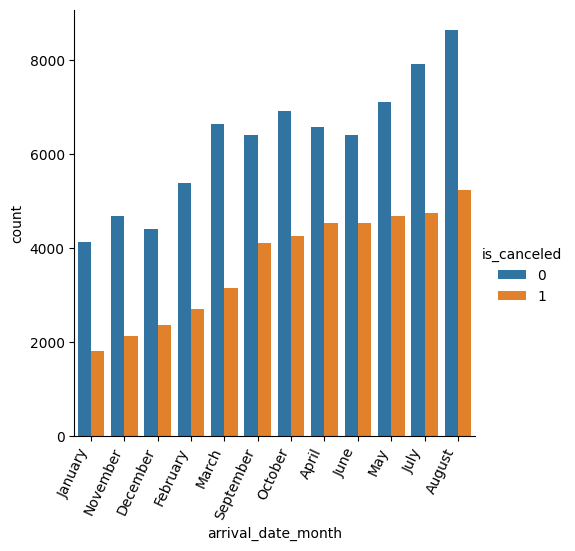

In [17]:
plot_order = df.groupby('arrival_date_month')['is_canceled'].sum().sort_values(ascending=True).index.values
chart = sns.catplot(data=df, x='arrival_date_month', hue='is_canceled', kind='count',order=plot_order)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

The graph tells that certain months have higher cancellations than others, hence arrival month is highly predictive of cancellation

**Arrival Week vs Cancellation**

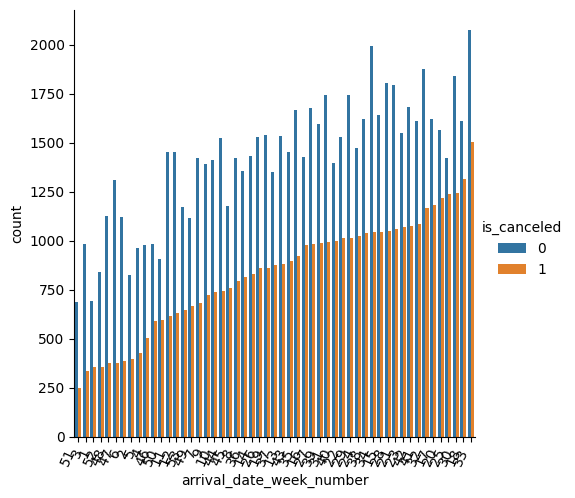

In [18]:
plot_order = df.groupby('arrival_date_week_number')['is_canceled'].sum().sort_values(ascending=True).index.values
chart = sns.catplot(data=df, x='arrival_date_week_number', hue='is_canceled', kind='count',order=plot_order)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

For some weeks, the cancelation rate is higher and for some week its lower.. Hence week number has a relation with cancelation.. Hence lets keep this feature as our predictor..

**Arrival Day vs Cancellation**

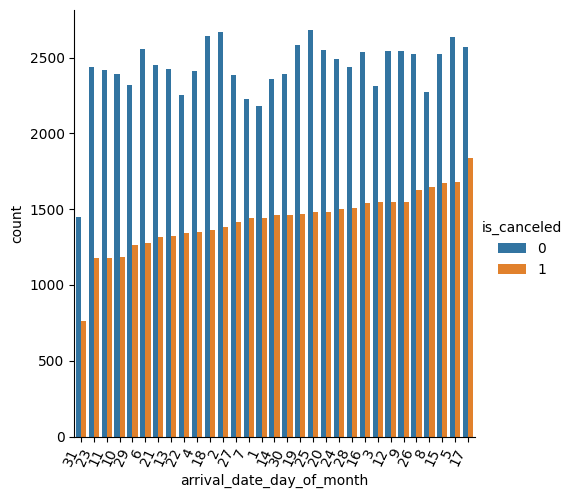

In [19]:
plot_order = df.groupby('arrival_date_day_of_month')['is_canceled'].sum().sort_values(ascending=True).index.values
chart = sns.catplot(data=df, x='arrival_date_day_of_month', hue='is_canceled', kind='count',order=plot_order)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Except few days, almost every day has same cancelation rate.. Hence there is no relation between arrival date and cancelation.. So lets drop this feature

In [20]:
#dropping arrival day
df.drop(['arrival_date_day_of_month'],axis=1,inplace=True)

**Stay in Weekend Nights vs Cancellations**

Firstly, Out of curiosity I want to see the unique values we have in this feature...

In [21]:
names = list(df['stays_in_weekend_nights'].unique())
dataframe = pd.DataFrame(names)
dataframe
# Use the code below to see all values in 'Market Category'...
# print(dataframe.to_string())  

,0
0,0
1,1
2,2
3,4
4,3
5,6
6,13
7,8
8,5
9,7


In [22]:
#want to see the dataset when guest has booked stays of 13 weekends.....
pd.set_option('display.max_columns', None)
df.loc[df['stays_in_weekend_nights'] == 13]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
1655,Resort Hotel,0,30,2015,September,37,13,33,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,I,17,No Deposit,240.0,0,Transient,0.00,0,1
32589,Resort Hotel,0,1,2017,February,5,13,32,1,0.0,0,BB,GBR,Direct,Direct,1,0,1,A,D,2,No Deposit,0.0,0,Transient,42.11,0,3
106561,City Hotel,0,11,2017,January,3,13,30,0,0.0,0,SC,Others,Online TA,TA/TO,0,0,0,A,K,14,No Deposit,9.0,0,Transient,0.00,0,0


Well, There is no cancelation if stay in weekend nights is worth 13 days.. Lets see for other days below...

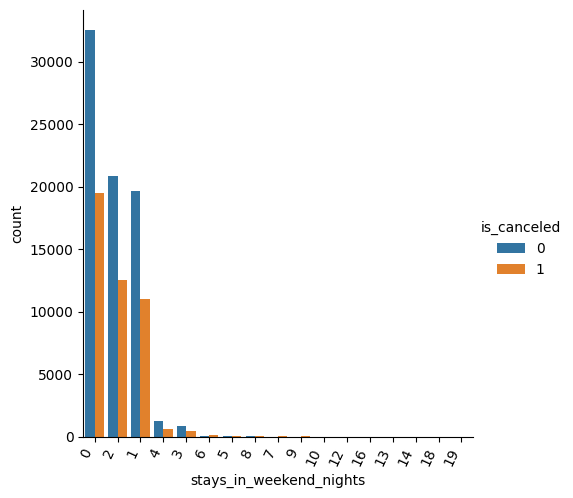

In [23]:
plot_order = df.groupby('stays_in_weekend_nights')['is_canceled'].sum().sort_values(ascending=False).index.values
chart = sns.catplot(data=df, x='stays_in_weekend_nights', hue='is_canceled', kind='count',order=plot_order)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

cancellation rate changes with change in stays in weekend nights, hence this is our potential predictor..

**stays_in_week_nights  vs cancellations**

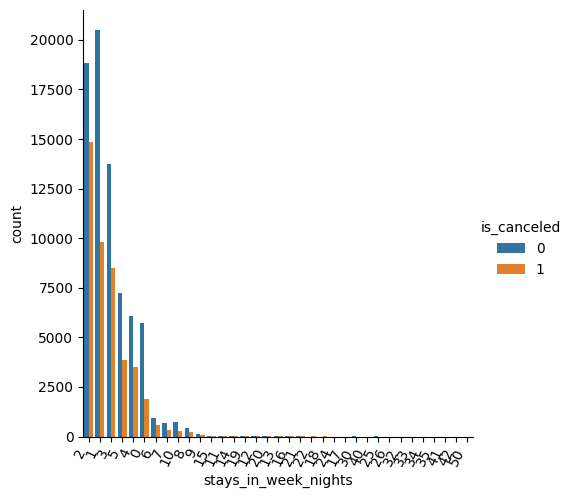

In [24]:
plot_order = df.groupby('stays_in_week_nights')['is_canceled'].sum().sort_values(ascending=False).index.values
chart = sns.catplot(data=df, x='stays_in_week_nights', hue='is_canceled', kind='count',order=plot_order)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

cancellation rate changes with change in stays in week nights as well, hence this is also our potential predictor..

**number of adults  vs cancellations**

<AxesSubplot: xlabel='adults', ylabel='count'>

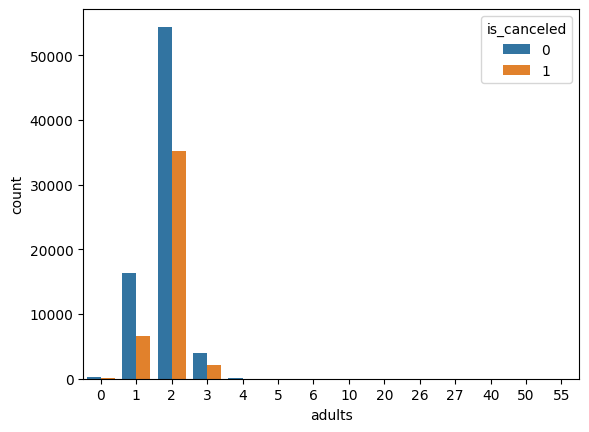

In [25]:
sns.countplot(data=df, x='adults', hue='is_canceled')

As number of adults changes, the cancelation rate changes.. Hence, lets keep this feature as one of our potential predictor..

**number of children vs cancellations**

<AxesSubplot: xlabel='children', ylabel='count'>

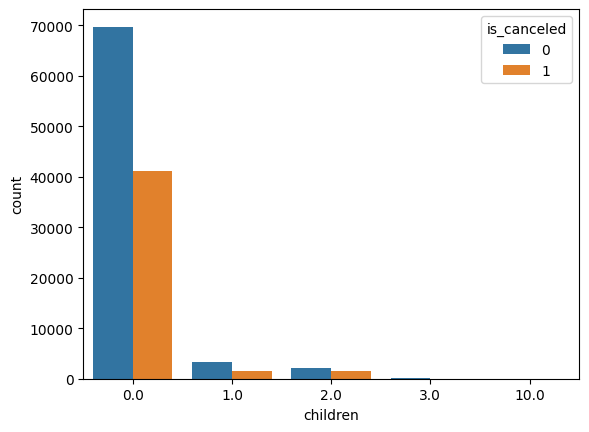

In [26]:
sns.countplot(data=df, x='children', hue='is_canceled')

When there are no children, then the cancelation rate is very high.. While if the guests have 1 or more children, the cancelation rate seems to be very less.. which means the guests with children are less likely to cancel the booking.... Hence let's keep this feature as our potential predictor..

**number of babies  vs cancellations**

<AxesSubplot: xlabel='babies', ylabel='count'>

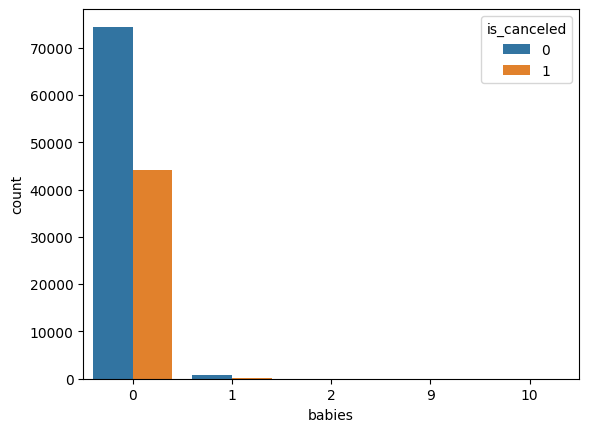

In [27]:
sns.countplot(data=df, x='babies', hue='is_canceled')

Same with babies, Guests are less likely to cancel the booking when they have babies with them...

**Meal Plan vs Cancelations?**

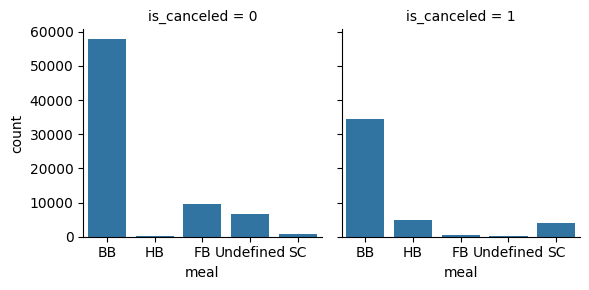

In [28]:
df['meal'].nunique(), df['is_canceled'].nunique()
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(sns.countplot, 'meal')

Well, the plot above shows that cancelation rate changes with the meal plan, but I believe that meal plan is not related with cancelation, because the chances that customer book hotels looking at their meal options are very less... They book meals once they select their hotel.... Also,, some meal plans have higher cancelations its just because those meals would be popular and bugdet friendly and for that reason, lot of customers would have booked that meal... Hence its safe to drop this feature from our dataframe....

In [29]:
# Dropping the meal feature......
df.drop(['meal'],axis=1,inplace=True)

**Market Segment vs Cancelation**

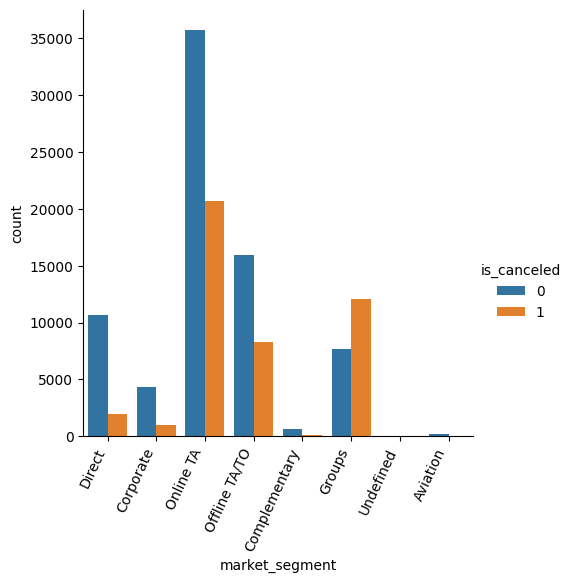

In [30]:
chart = sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

From the plot above, we could see that certain market segments have higher cancelations than other... this describes the behavior of customers coming through different market segments which can be predictive of booking cancelation.. hence let's keep is feature as our potential predictor....

**Distribution Channel vs Cancelation**

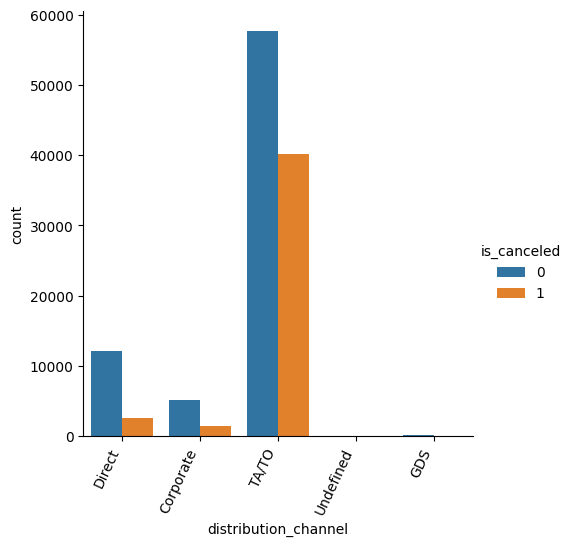

In [31]:
chart = sns.catplot(data=df, x='distribution_channel', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Same like market segment, there are certain distribution channels which have higher cancelation rates.. But these channels are market semgent looks to be correlated.. So for now let's keep this feature but later when do the multi colinearity analysis.. if this feature come out to correlated with market segment... then we will remove this feature...

**Repeated Guest vs Cancelation**

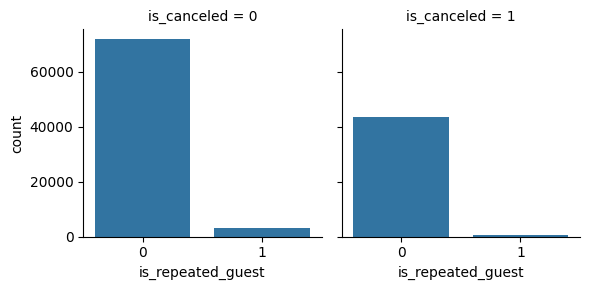

In [32]:
df['is_repeated_guest'].nunique(), df['is_canceled'].nunique()
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(sns.countplot, 'is_repeated_guest')

We could clearly see that, If the guest is repeated, then the likelihood of the guest canceling the booking is very less..Hence lets keep this feature as our potential predictor...

**Previous Cancellation  vs Cancellations**

<AxesSubplot: xlabel='previous_cancellations', ylabel='count'>

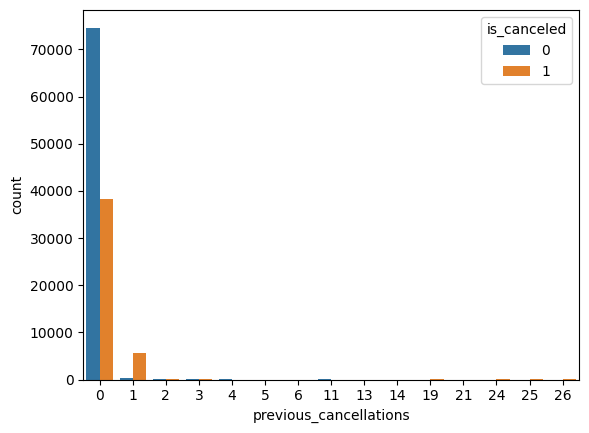

In [33]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')

Let's plot a table to deep dive and understand the number of previous cancelations and current cancelation count

In [34]:
pc = df.query("is_canceled == 1").groupby('previous_cancellations')['is_canceled'].count().reset_index(name='sum bookings canceled').sort_values(['previous_cancellations'], ascending=True)
print(pc.to_string())

    previous_cancellations  sum bookings canceled
0                        0                  38282
1                        1                   5714
2                        2                     38
3                        3                     20
4                        4                      7
5                        5                      2
6                        6                      7
7                       11                     10
8                       13                     11
9                       14                     14
10                      19                     19
11                      21                      1
12                      24                     48
13                      25                     25
14                      26                     26


So, With change in previous cancellation, the cancelation rate changes.. The maximum number of guests in this dataset
have not canceled booking before, so might be they are booking for the first time... But for the guests, who have canceled 
the booking previously, they have again canceled the booking.. Hence there is a positive correlation between this feature
and cancelation


#### Previous Bookings not Canceled vs Cancelation

In above analysis of Previous Cancelation vs Cancelation rate.. we saw that previous cancelation holds positive corelation with cancelation rate.. So, lets see if Previous booking not canceled will have exact opposite correlation with cancelation rate... Let's see correlation between Previous bookings not canceled vs previous cancelation

<AxesSubplot: xlabel='previous_bookings_not_canceled', ylabel='previous_cancellations'>

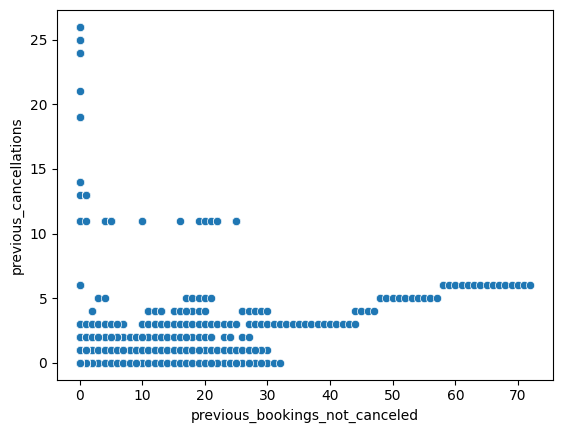

In [35]:
#Scatter plot to find relation between previous_cancellations and previous_bookings_not_canceled
sns.scatterplot(data=df,y="previous_cancellations",x="previous_bookings_not_canceled")

There doesn't look any correlation between these two features, hence lets find out if previous bookings not canceled has relation with cancelation

<AxesSubplot: xlabel='previous_bookings_not_canceled', ylabel='count'>

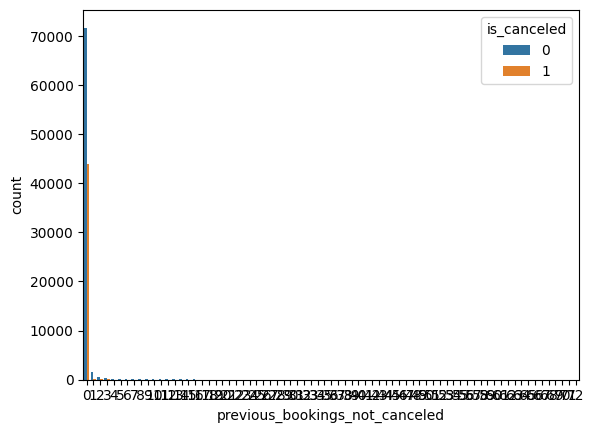

In [36]:
sns.countplot(data=df, x='previous_bookings_not_canceled', hue='is_canceled')

Lets plot a table to better understand this feature

In [37]:
pbnc = df.query("is_canceled == 1").groupby('previous_bookings_not_canceled')['is_canceled'].count().reset_index(name='sum bookings not canceled').sort_values(['previous_bookings_not_canceled'], ascending=True)
print(pbnc.to_string())

    previous_bookings_not_canceled  sum bookings not canceled
0                                0                      44024
1                                1                         79
2                                2                         32
3                                3                         17
4                                4                         12
5                                5                         11
6                                6                          3
7                                7                          5
8                                8                          3
9                               10                          7
10                              11                          5
11                              12                          3
12                              13                          2
13                              14                          2
14                              15                          2
15      

So from this table, we can infer that.. majority of cancelations have happened from the customers whose didn't cancel previous bookings.. this again might be because those customers have booked the hotel for first time.. But the customers who didn't cancel previous booking... previous bookings not canceled increases,,,cancelation rate decreases.... This means this feature is highly correlated with cancelation

**Reserved Room Type vs Assigned Room Type vs Cancelation**

In [38]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

This states that when reserved room type is not as assigned room type, then there is only 5 % cancelation..which rejects our assumption mentioned above.... this means both of these features are not correlated with cancelation and we should drop them

In [39]:
#Dropping Reserved room Type
df.drop(['reserved_room_type'],axis=1,inplace=True)

In [40]:
#Dropping Assigned room Type
df.drop(['assigned_room_type'],axis=1,inplace=True)

**Booking Changes vs Cancelation**

<AxesSubplot: xlabel='booking_changes', ylabel='is_canceled'>

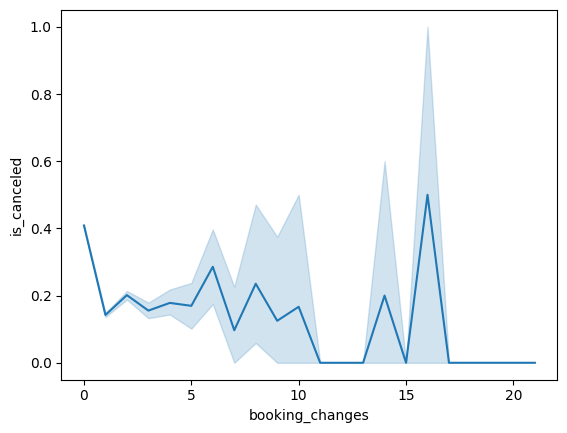

In [41]:
sns.lineplot(data=df, x='booking_changes', y='is_canceled')

From this plot, we can state that there is no relation between booking changes and cancelation,, as it goes up and down as booking changes increases... hence let's drop this feature.. 

In [42]:
#Dropping Booking Changes....
df.drop(['booking_changes'],axis=1,inplace=True)

**Deposit type vs Cancelation**

<AxesSubplot: xlabel='deposit_type', ylabel='count'>

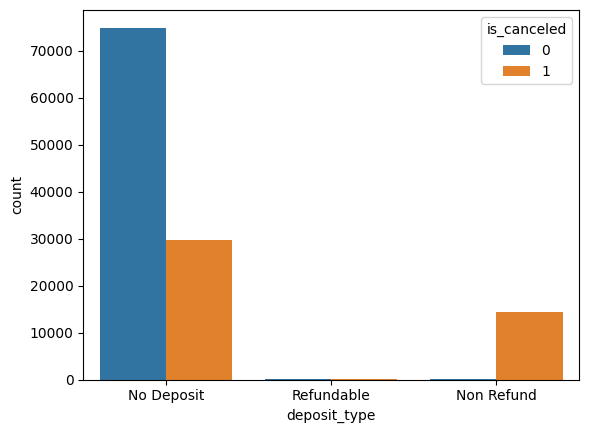

In [43]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df)

So, this plot states that the bookings which have no deposit or non refundable are more likely to get canceled.. So this feature shows relation with cancelation.. hence lets keep this in our potential list of predictor...

**Days_in_waiting_list vs Cancelation**

<AxesSubplot: xlabel='days_in_waiting_list', ylabel='is_canceled'>

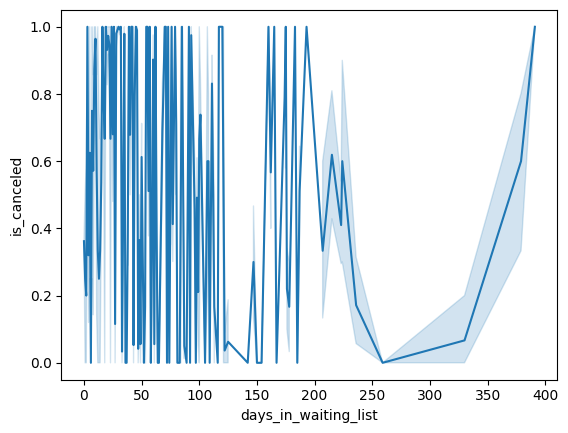

In [44]:
sns.lineplot(data=df, x='days_in_waiting_list', y='is_canceled')

So, from the plot above.. No relation can be established between days_in_waiting_list and cancelation....Hence we can drop this feature....

In [45]:
#dropping days in waiting list.....
df.drop(['days_in_waiting_list'],axis=1,inplace=True)

**Customer Type vs Cancelation**

<AxesSubplot: xlabel='customer_type', ylabel='is_canceled'>

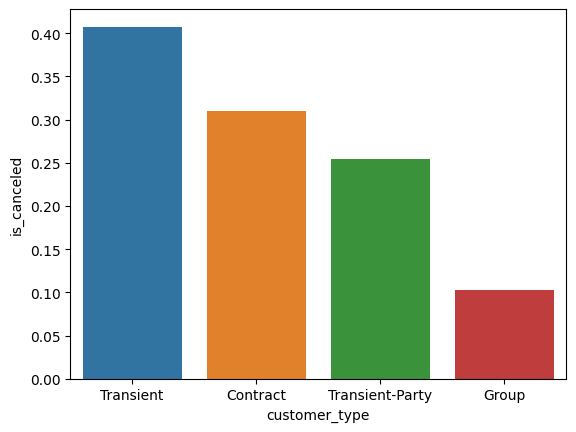

In [46]:
sns.barplot(data=df, x='customer_type', y='is_canceled', ci=None)

So, from the plot.. we can infer that different customer types shows different pattern in booking cancelation... hence lets keep this feature as our potential list of predictors..

#### Required Car Parking Space vs Cancelation

In [47]:
rcps = df.query("is_canceled == 1").groupby('required_car_parking_spaces')['is_canceled'].count().reset_index(name='sum bookings canceled').sort_values(['required_car_parking_spaces'], ascending=True)
print(rcps.to_string())

   required_car_parking_spaces  sum bookings canceled
0                            0                  44224


So, from the table,, we can see that all booking which have been canceled have come from the guests which didn't require parking space... Hence this feature doesn't relate with cancelation.. So lets drop this feature... 

In [48]:
df.drop(['required_car_parking_spaces'],axis=1,inplace=True)

**Total Special Requests vs Cancelation**

<AxesSubplot: xlabel='total_of_special_requests', ylabel='is_canceled'>

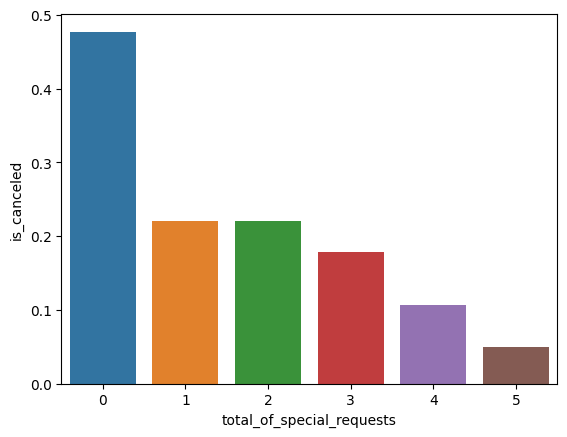

In [49]:
sns.barplot(data=df, x='total_of_special_requests', y='is_canceled', ci=None)

We can infer from this graph that.. if total special requests increases,, he cancelation rate decreases.. Hence lets keep this feature as our potential predictor...

**As we are done with feature selection, lets remove duplicates and null values from our dataset if any..**

In [50]:
# drop any duplicate records
df.drop_duplicates(inplace=True)

In [51]:
# drop all rows that contain missing values
df = df.dropna()

### Now Let's encode the categorical variable to numerical variable....

In [52]:
#Defining object 'cat_vars' which contains our categorical variables..
cat_vars = ['hotel','arrival_date_month','country', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type']
# Loop over categorical vars and encode each one
for var in cat_vars:
    df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_')

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,84460.0,0.278901,0.448462,0.00,0.0000,0.0,1.0,1.0
lead_time,84460.0,78.792541,84.866180,0.00,11.0000,48.0,123.0,737.0
arrival_date_year,84460.0,2016.218541,0.683008,2015.00,2016.0000,2016.0,2017.0,2017.0
arrival_date_week_number,84460.0,26.781589,13.644816,1.00,16.0000,27.0,37.0,53.0
stays_in_weekend_nights,84460.0,1.015522,1.035492,0.00,0.0000,1.0,2.0,19.0
stays_in_week_nights,84460.0,2.641973,2.065764,0.00,1.0000,2.0,4.0,50.0
adults,84460.0,1.883850,0.627842,0.00,2.0000,2.0,2.0,55.0
children,84460.0,0.142647,0.461899,0.00,0.0000,0.0,0.0,10.0
babies,84460.0,0.011165,0.115385,0.00,0.0000,0.0,0.0,10.0
is_repeated_guest,84460.0,0.039983,0.195921,0.00,0.0000,0.0,0.0,1.0


### MODEL SELECTION and RESULTS

#### Splitting the data into Training and Testing

In [54]:
train_var = df.drop(['is_canceled'], axis=1)
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((67568, 53), (67568,), (16892, 53), (16892,))

#### Scaling the data

In [60]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

#### 1. Logistic Regression..

In [61]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

Average cross validation score: 0.770
Test accuracy: 0.768
F1 score: 0.473
[[11225  1008]
 [ 2904  1755]]


#### 2. KNN

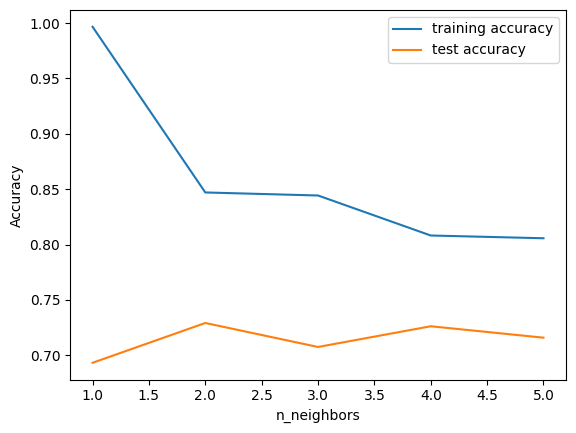

In [63]:
#KNN
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [64]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))

Average cross validation score: 0.703
Test accuracy: 0.708
F1 score: 0.423
[[10138  2095]
 [ 2845  1814]]


#### 3. Decision Tree

In [65]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.720
Test accuracy: 0.724
F1 score: 0.000
[[12233     0]
 [ 4659     0]]


#### 4. Random Forest

In [67]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [68]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best score: 0.7417861089613813
Test score: 0.745
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.7861412172762756
Test score: 0.792


#### 5. Multi-layer Perceptron (Artifical Neural Network)

In [69]:
#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 0.844
Test accuracy: 0.822
F1 score: 0.652
[[11054  1179]
 [ 1834  2825]]


So after testing the performance of all models, We would go ahead with MLP as it has the highest Test accuracy score i.e 82%, no big sign of overfitting as model has performed equally well on Test data... 

### Recommendations:

As we are have now performed Machine Learning sucessfully.. Lets take about what strategies should we deploy once we get cancelation prediction of each booking..<br>
1. **Offer them Discount on their next booking:** Send out notification to those customers that they are eligible for a big discount such as 80% on their next booking.. With this attractive offer, the customer will most likely not cancel the booking but also come visit the hotel next time and might become loyal customer.. <br>
2. **Offer them a free added service:** Send out notification to those customers that they are eligible for a free room upgrade or free meal of their choice.. This would make the deal look more attractive to the customer and cancelation probablity will drop..<br>
3. **Be proactive:** While customer doesn't expect this, but they would be surprised and love it when you proactively reach them out via phone call to understand if they are all prepared for their upcoming stay.. if not, then you can help them out.. This would most likely reduce the cancelation. If this process comes out to be costly,, automated emails customizef for the customer would work as well..<br>
4. **Overbooking Strategy:** If for certain week/month or time period.. You see a prediction of higher cancellations.. Then, Never be hesitant to oversell. Naturally, this is not recommended for a small-sized property. But for a big hotel network, Take a chance. Inevitably, it will lessen the effects of last-minute cancellations and no-shows.